<a href="https://colab.research.google.com/github/SBakthavachalam/Data-Science---Project/blob/main/KMeans_Algorithm_Salary_Data_Sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explore the *data*

In [1]:
import pandas as pd
df = pd.read_csv('/content/income.csv')
df.head(5)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [20]:
df.isnull().sum()

Name         0
Age          0
Income($)    0
dtype: int64

In [3]:
df.columns
x = df[['Age', 'Income($)']]

Identify the problem by visualizing the data.
in this data sets, the data looks like un supervised problem.



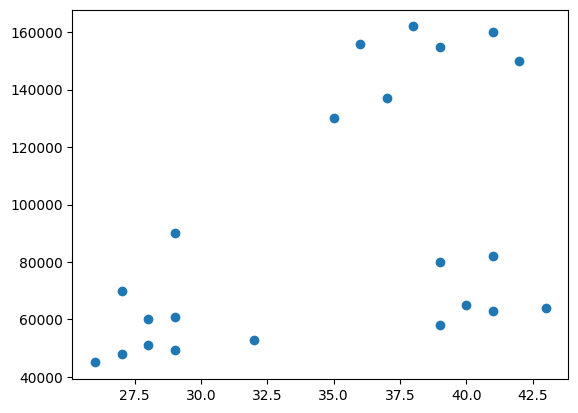

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x['Age'], x['Income($)'], marker='o')

(array([1., 2., 2., 3., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 3., 1.,
        3., 1., 1.]),
 array([26.  , 26.85, 27.7 , 28.55, 29.4 , 30.25, 31.1 , 31.95, 32.8 ,
        33.65, 34.5 , 35.35, 36.2 , 37.05, 37.9 , 38.75, 39.6 , 40.45,
        41.3 , 42.15, 43.  ]),
 <BarContainer object of 20 artists>)

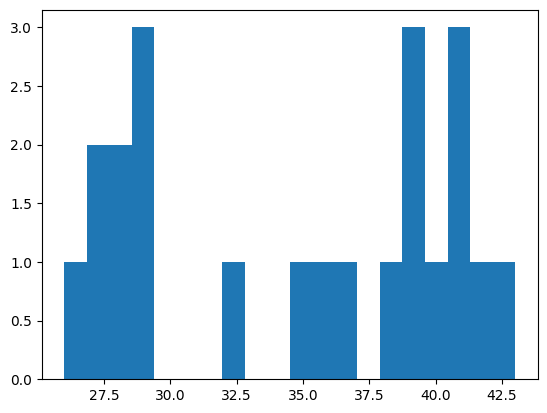

In [13]:
plt.hist(x['Age'], bins=20)

Magnitude is high and bring all the features into 0's and 1's


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().set_output(transform='pandas')
scaler.fit(x)
x_scaled = scaler.transform(x)
x1_scaled = x_scaled

Check the data sets are evenly distributed by preprocessing technique.

No change in the data flow and this has been verified by histogram

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income($)'}>]], dtype=object)

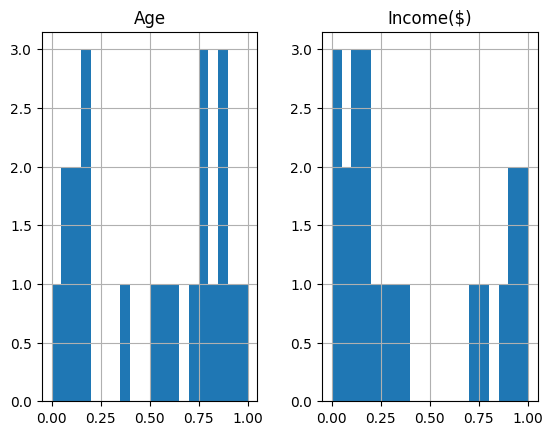

In [7]:
x_scaled.hist(bins=20)

Find out Inertia.

There should not be 1 group and not more than 10 group, so the range will be 2 to 10 **bold text**

In [8]:
from sklearn.cluster import KMeans
SSE = []
K_Range = range (2,10)
for K in K_Range:
    KM = KMeans(n_clusters=K)
    KM.fit(x_scaled)
    SSE.append(KM.inertia_)
SSE

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[2.091136388699078,
 0.4750783498553096,
 0.368773407644059,
 0.2621792762345213,
 0.21055478995472496,
 0.16869711728567788,
 0.13265419827245162,
 0.11304517838728054]

Identify the cluster grouping by visualization

In this data sets, there are 3 group.

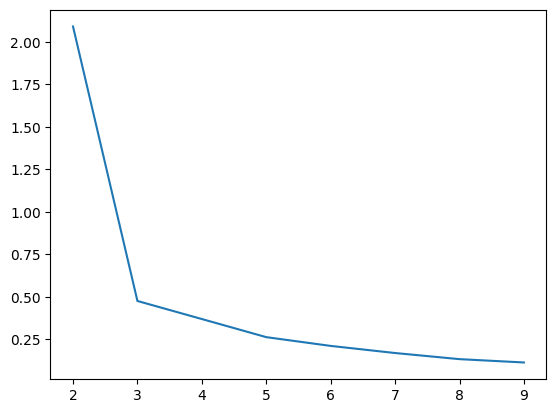

In [9]:
import matplotlib.pyplot as plt
plt.plot(K_Range, SSE)

Create a KMeans Model and predict unseen data.

In [10]:
from sklearn.cluster import KMeans
KMeans = KMeans(n_clusters = 3)
KMeans.fit(x_scaled)
x_scaled['traget']= KMeans.labels_
x_scaled.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Income($),traget
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


the other way

In [11]:
from sklearn.cluster import KMeans
KMeans = KMeans(n_clusters = 3)
KMeans.fit(x1_scaled)
y = KMeans.predict(x1_scaled)
# Combine features and predicted cluster (target)
y1 = pd.DataFrame({'Cluster':y})
df1 = pd.concat([x1_scaled, y1], axis=1)
df1.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Income($),traget,Cluster
0,0.058824,0.213675,0,1
1,0.176471,0.384615,0,1
2,0.176471,0.136752,0,1
3,0.117647,0.128205,0,1
4,0.941176,0.897436,1,2


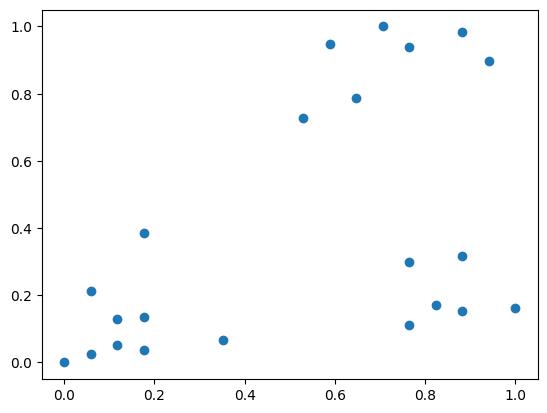

In [12]:
plt.scatter(df1['Age'], df1['Income($)'])